In [1]:
!pip install tensorflow pandas numpy matplotlib seaborn scikit-learn

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
df = pd.read_csv(r"C:\Users\lundy\Downloads\archive\diabetes.csv.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
print("\nMissing values per column:\n", df.isnull().sum())



Missing values per column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


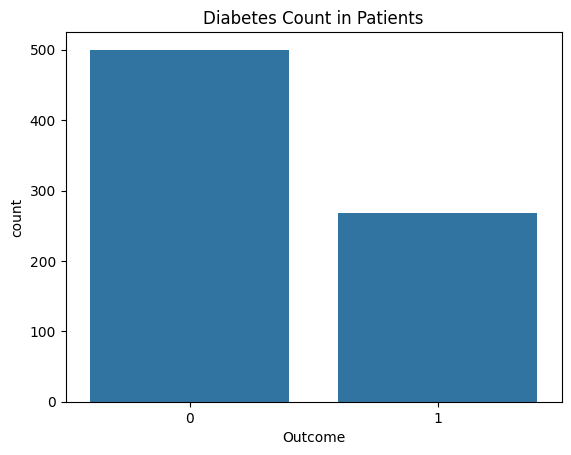

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Outcome'])  # Outcome is the label (0 = No Diabetes, 1 = Diabetes)
plt.title("Diabetes Count in Patients")
plt.show()


In [15]:
from sklearn.model_selection import train_test_split

# Define features (X) and labels (y)
X = df.drop(columns=['Outcome'])  # All columns except the target variable
y = df['Outcome']  # The target variable (0 = No Diabetes, 1 = Diabetes)

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")


Training Data: (614, 8), Testing Data: (154, 8)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)  # Transform test data (use same scaler)

print("Data normalized!")


Data normalized!


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    Dense(8, activation='relu'),  # Hidden Layer
    Dense(1, activation='sigmoid')  # Output Layer (sigmoid for binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()


C:\Users\lundy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6616 - loss: 0.6125 - val_accuracy: 0.6818 - val_loss: 0.6344
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7126 - loss: 0.5577 - val_accuracy: 0.7143 - val_loss: 0.5952
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7745 - loss: 0.5071 - val_accuracy: 0.7468 - val_loss: 0.5654
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7660 - loss: 0.4924 - val_accuracy: 0.7532 - val_loss: 0.5452
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7357 - loss: 0.5086 - val_accuracy: 0.7403 - val_loss: 0.5353
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7893 - loss: 0.4600 - val_accuracy: 0.7403 - val_loss: 0.5303
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7725 - loss: 0.4673 - val_accuracy: 0.7468 - val_loss: 0.5259
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7622 - loss: 0.4709 - val_accuracy: 0.7597 - val_loss:

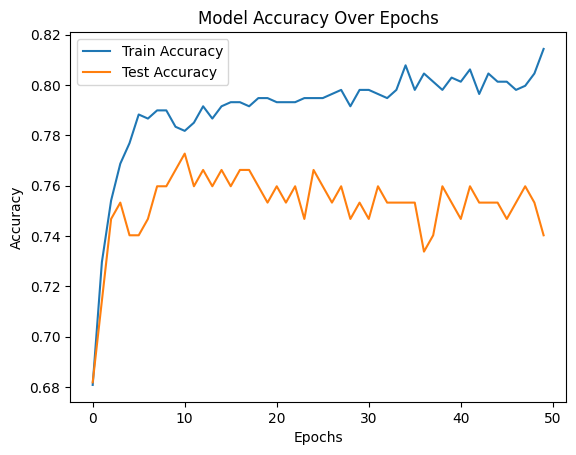

In [20]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [21]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7385 - loss: 0.5612 
Test Accuracy: 0.74


In [22]:
import numpy as np

# Example patient data (Glucose, BloodPressure, etc.)
new_patient = np.array([[120, 70, 30, 20, 180, 33.6, 0.5, 45]])  

# Scale the new data (use same scaler)
new_patient_scaled = scaler.transform(new_patient)

# Make a prediction
prediction = model.predict(new_patient_scaled)

# Show result
print("Diabetes Probability:", prediction[0][0])

if prediction[0][0] > 0.5:
    print("🚨 Patient likely has diabetes.")
else:
    print("✅ Patient is unlikely to have diabetes.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Diabetes Probability: 1.0
🚨 Patient likely has diabetes.
